# Customer Churn Predicition

## Data Exporation

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_churn_dataset-testing-master.csv")


In [3]:
df.shape

(64374, 12)

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


#### df does'nt contains null values

In [6]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [7]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [8]:
df['Subscription Type'].unique()

array(['Basic', 'Standard', 'Premium'], dtype=object)

In [9]:
df['Contract Length'].unique()

array(['Monthly', 'Annual', 'Quarterly'], dtype=object)

In [10]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

## Data Visualisation

df['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Custumer Churn")
plt.axis('equal')

Text(0.5, 1.0, 'Gender Churn')

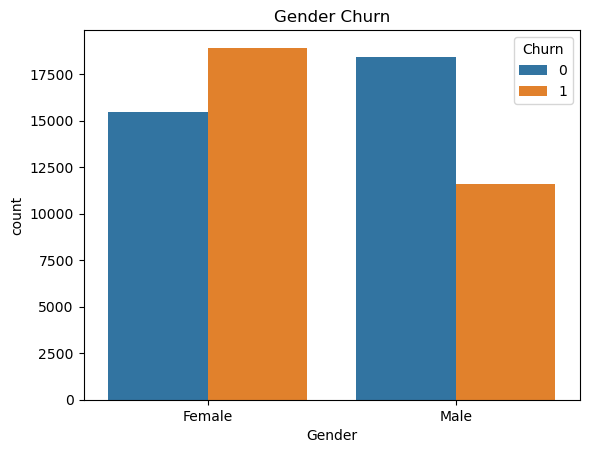

In [11]:
sns.countplot(x='Gender',
             data=df,
             hue='Churn').set_title("Gender Churn")

Text(0.5, 1.0, 'Plan Churn')

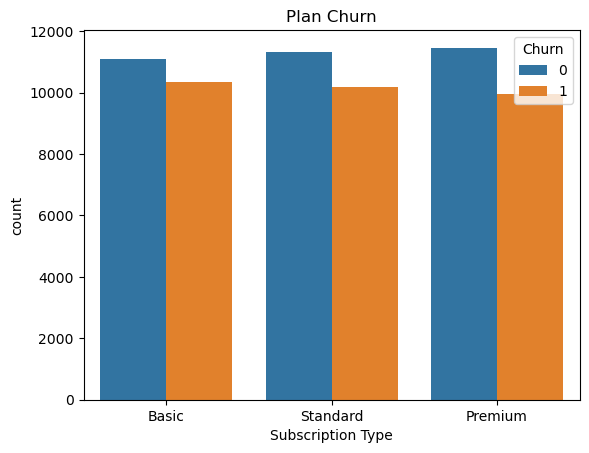

In [12]:
sns.countplot(x='Subscription Type',
              data=df,
              hue="Churn").set_title("Plan Churn")

Text(0.5, 1.0, 'Contract')

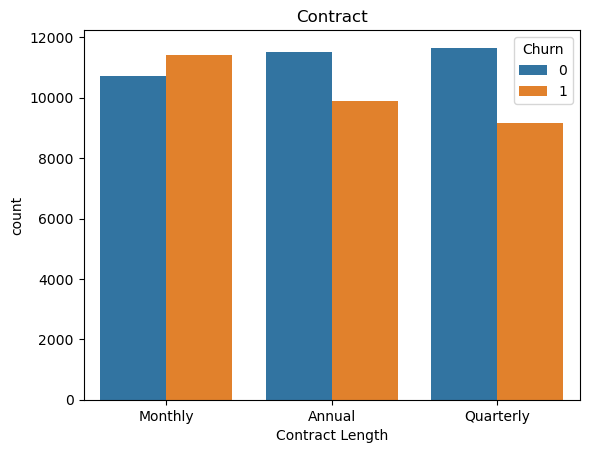

In [13]:
sns.countplot(x='Contract Length',
              data=df,
              hue='Churn').set_title("Contract")

## Data PreProcessing

In [14]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [15]:
df['Contract Length'].unique()

array(['Monthly', 'Annual', 'Quarterly'], dtype=object)

In [16]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df['Subscription Type'].unique()

array(['Basic', 'Standard', 'Premium'], dtype=object)

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
encoder = OrdinalEncoder()

In [20]:
df['Contract Length'] = encoder.fit_transform(df[['Contract Length']])

In [21]:
df['Subscription Type'] = encoder.fit_transform(df[['Subscription Type']])

In [22]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,0.0,1.0,598,9,1
1,2,41,Female,28,28,7,13,2.0,1.0,584,20,0
2,3,47,Male,27,10,2,29,1.0,0.0,757,21,0
3,4,35,Male,9,12,5,17,1.0,2.0,232,18,0
4,5,53,Female,58,24,9,2,2.0,0.0,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,0.0,2.0,947,14,1
64370,64371,37,Male,6,1,5,22,2.0,0.0,923,9,1
64371,64372,25,Male,39,14,8,30,1.0,1.0,327,20,1
64372,64373,50,Female,18,19,7,22,2.0,1.0,540,13,1


In [23]:


df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [24]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0,25,14,4,27,0.0,1.0,598,9,1
1,2,41,0,28,28,7,13,2.0,1.0,584,20,0
2,3,47,1,27,10,2,29,1.0,0.0,757,21,0
3,4,35,1,9,12,5,17,1.0,2.0,232,18,0
4,5,53,0,58,24,9,2,2.0,0.0,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,0,33,12,6,21,0.0,2.0,947,14,1
64370,64371,37,1,6,1,5,22,2.0,0.0,923,9,1
64371,64372,25,1,39,14,8,30,1.0,1.0,327,20,1
64372,64373,50,0,18,19,7,22,2.0,1.0,540,13,1


In [25]:
df.corr()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
CustomerID,1.000000,0.043287,-0.085960,0.103296,-0.062699,0.164175,0.290684,-0.001768,-0.011331,-0.037068,-0.003718,0.529832
Age,0.043287,1.000000,0.001800,-0.007763,-0.038331,0.005014,-0.016132,0.004472,0.000093,0.006490,-0.000148,0.063457
Gender,-0.085960,0.001800,1.000000,0.029418,-0.006907,0.035418,-0.058578,0.006374,-0.008933,0.029337,-0.000472,-0.164549
Tenure,0.103296,-0.007763,0.029418,1.000000,0.023485,0.060065,0.055963,0.004202,0.000730,0.009474,0.005770,0.195327
Usage Frequency,-0.062699,-0.038331,-0.006907,0.023485,1.000000,-0.014072,0.031132,-0.000649,0.011288,0.001527,-0.009192,-0.115098
Support Calls,0.164175,0.005014,0.035418,0.060065,-0.014072,1.000000,0.064298,-0.003178,-0.003080,0.021750,0.001666,0.304631
Payment Delay,0.290684,-0.016132,-0.058578,0.055963,0.031132,0.064298,1.000000,-0.001510,0.001937,-0.031119,-0.008076,0.557386
Subscription Type,-0.001768,0.004472,0.006374,0.004202,-0.000649,-0.003178,-0.001510,1.000000,-0.000036,-0.003636,-0.002227,-0.007738
Contract Length,-0.011331,0.000093,-0.008933,0.000730,0.011288,-0.003080,0.001937,-0.000036,1.000000,0.006638,0.003859,-0.017098
Total Spend,-0.037068,0.006490,0.029337,0.009474,0.001527,0.021750,-0.031119,-0.003636,0.006638,1.000000,-0.007692,-0.078867


## Spliting DataSet for test and train

In [26]:
y=df['Churn']

In [27]:
X=df.copy()

In [28]:
X.drop("Churn",axis=1)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,1,22,0,25,14,4,27,0.0,1.0,598,9
1,2,41,0,28,28,7,13,2.0,1.0,584,20
2,3,47,1,27,10,2,29,1.0,0.0,757,21
3,4,35,1,9,12,5,17,1.0,2.0,232,18
4,5,53,0,58,24,9,2,2.0,0.0,533,18
...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,0,33,12,6,21,0.0,2.0,947,14
64370,64371,37,1,6,1,5,22,2.0,0.0,923,9
64371,64372,25,1,39,14,8,30,1.0,1.0,327,20
64372,64373,50,0,18,19,7,22,2.0,1.0,540,13


In [29]:
y

0        1
1        0
2        0
3        0
4        0
        ..
64369    1
64370    1
64371    1
64372    1
64373    1
Name: Churn, Length: 64374, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)

(45061, 12)
(19313, 12)


## Model Training Begins!

### Model Evaluation Function

In [33]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
model = []
acc = []
prec = []

In [34]:
def eval(m,y,pred):
    cnf = confusion_matrix(y,pred)
    a = accuracy_score(y,pred)
    p = precision_score(y,pred)
    print("Confusion Matrix :\n",cnf)
    print(f"\nAccuracy : {a*100} %\n")
    print(f"Precision : {p*100} %\n")
    model.append(m)
    acc.append(a)
    prec.append(p)
    

## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(random_state=42)

In [37]:
rf


RandomForestClassifier(random_state=42)

In [38]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [39]:
preds = rf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [41]:
cnf = confusion_matrix(y_test,preds)

In [42]:
print("Random Forest Model Evaluation :\n")
eval("Random Forest",y_test,preds)

Random Forest Model Evaluation :

Confusion Matrix :
 [[10134     0]
 [    0  9179]]

Accuracy : 100.0 %

Precision : 100.0 %



## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier


In [44]:
dt = DecisionTreeClassifier(random_state=42)

In [45]:
dt

DecisionTreeClassifier(random_state=42)

In [46]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
dt_pred = dt.predict(X_test)

In [48]:
print("Decision Tree Classifier Evaluation:\n")
eval("Decision Tree",y_test,dt_pred)

Decision Tree Classifier Evaluation:

Confusion Matrix :
 [[10134     0]
 [    0  9179]]

Accuracy : 100.0 %

Precision : 100.0 %



## Support Vector Machine

In [49]:
from sklearn.svm import SVC

In [50]:
svc = SVC(kernel='rbf')

In [51]:
svc

SVC()

In [52]:
svc.fit(X_train,y_train)

SVC()

In [53]:
svc_pred = svc.predict(X_test)

In [54]:
print("SVM(RBF) Evaluation\n")
eval("SVC(RBF)",y_test,svc_pred)

SVM(RBF) Evaluation

Confusion Matrix :
 [[9830  304]
 [3473 5706]]

Accuracy : 80.44322477087972 %

Precision : 94.94176372712147 %



## Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
nb = GaussianNB()


In [57]:
nb

GaussianNB()

In [58]:
nb.fit(X_train,y_train)

GaussianNB()

In [59]:
nb_pred = nb.predict(X_test)


In [60]:
print("Naive Bayes Evaluation\n")
eval("Naive Bayes",y_test,nb_pred)

Naive Bayes Evaluation

Confusion Matrix :
 [[9954  180]
 [ 389 8790]]

Accuracy : 97.05379795992337 %

Precision : 97.9933110367893 %



## LDA

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [62]:
lda = LinearDiscriminantAnalysis(n_components=1)

In [63]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=1)

In [64]:
lda_pred = lda.predict(X_test)

In [65]:
print("LDA model Evaluation\n")
eval("LDA",y_test,lda_pred)

LDA model Evaluation

Confusion Matrix :
 [[8803 1331]
 [1378 7801]]

Accuracy : 85.97317868793041 %

Precision : 85.42487954445905 %



## KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn =KNeighborsClassifier(2)

In [68]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [69]:
knn_pred = knn.predict(X_test)

In [70]:
print("KNN Model Evaluation\n")
eval("KNN",y_test,knn_pred)

KNN Model Evaluation

Confusion Matrix :
 [[9506  628]
 [3232 5947]]

Accuracy : 80.01346243462952 %

Precision : 90.44866920152091 %



In [71]:
model

['Random Forest', 'Decision Tree', 'SVC(RBF)', 'Naive Bayes', 'LDA', 'KNN']

In [72]:
prec

[1.0,
 1.0,
 0.9494176372712146,
 0.979933110367893,
 0.8542487954445904,
 0.9044866920152091]

## Result Analysis

Text(0, 0.5, 'Accuracy Score')

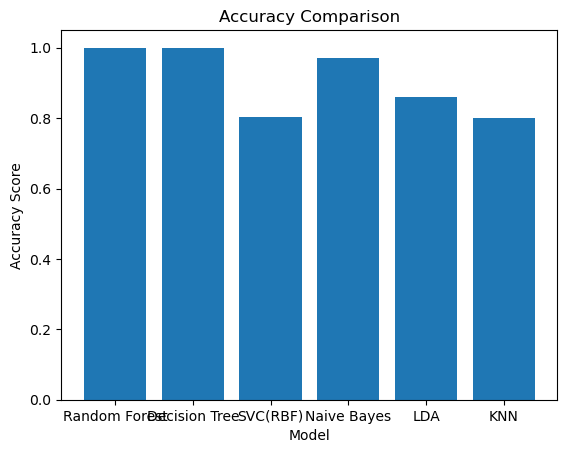

In [73]:
plt.bar(model,
        acc)
plt.title("Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")


Text(0, 0.5, 'Precision Score')

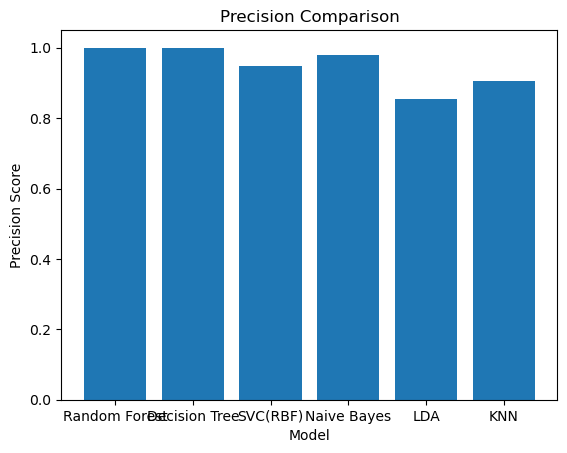

In [74]:
plt.bar(model,
        prec)
plt.title("Precision Comparison")
plt.xlabel("Model")
plt.ylabel("Precision Score")


## Conclusion
    Both Random Forest and Decision Tree perform's well among other models